## Seismic wavefield visualization and comparison
### D. Li
### 7 Feb. 2024


In [26]:
# load modulus
import numpy as np
import seissolxdmf
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt

# import seaborn as sbn


In [2]:
import matplotlib
from matplotlib.ticker import MultipleLocator
print(matplotlib.style.available)

# matplotlib.rc('font', **font)
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['font.size'] = 15
# matplotlib.rcParams['legend.fontsize'] = 14
# matplotlib.rcParams['xtick.direction'] = 'in'
# matplotlib.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.major.size'] = 5.0
# plt.rcParams['xtick.minor.size'] = 3.0
# plt.rcParams['ytick.major.size'] = 5.0
# plt.rcParams['ytick.minor.size'] = 3.0

# plt.rcParams['axes.linewidth'] = 1.2
# plt.rcParams['legend.handlelength'] = 3.0


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [109]:
# load seissol out put data and extract station
# load GM data and compare station-to-station


def find_surf_site(stafolder, stafile, xdmfFilename,modelname):
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    # Number of cells
    nElements = sx.ReadNElements()
    # Read time step
    dt = sx.ReadTimeStep()
    # Read number of time steps
    ndt = sx.ReadNdt()
    # load geometry array as a numpy array of shape ((nodes, 3))
    surfxyz= sx.ReadGeometry()
    # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
    # The connectivity array gives for each cell a list of vertex ids.
    connect = sx.ReadConnect()
    # horizontal comp. and vertical
    # u = sx.ReadData('v1')
    # v = sx.ReadData('v2')
    # w = sx.ReadData('v3')
    # print('(ndt,nelemenet)= ', u.shape)
    # print('time interval=', dt)
    
    sitexyz = np.loadtxt(staFile)
    # coordinates convert if necessary
    # staxyz = pyproj.transform(myproj,lla,gmData.long,gmData.lat,radians=False)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    Receiver = np.array(sitexyz)
    
    # Receiver = Receiver.transpose()
    
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    FidReceiversnew =  stafolder + modelname + '-'+ 'site_xyz.txt'
    fout = open(FidReceiversnew,'w')
    fout1 = open(stafolder + modelname + '-'+'site_number.txt','w')
    
    for k in range(sitexyz[:,0].size):
        #newrec = find_nearest_vector(centers, rec)
        newrec = centers[ids[k]]
        print(k,ids[k])
        fout.write("%f %f %f\n" %(newrec[0],newrec[1],newrec[2]))
        fout1.write("%d %f\n" %(ids[k],dist[k]))

        # data = np.array([u[:,ids[k]],v[:,ids[k]],w[:,ids[k]]])
        # np.savetxt(stafolder + modelname + '/sta'+ str(k)+'.txt',data.transpose())
        
    fout.close()
    fout1.close()

In [47]:
# extract station output
# seissolxdmf.seissolxdmf.ReadData?

# sx = seissolxdmf.seissolxdmf(xdmfFilename)
# # Number of cells
# nElements = sx.ReadNElements()
# # Read time step
# dt = sx.ReadTimeStep()
# # Read number of time steps
# ndt = sx.ReadNdt()
# # load geometry array as a numpy array of shape ((nodes, 3))
# surfxyz= sx.ReadGeometry()
# # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
# # The connectivity array gives for each cell a list of vertex ids.
# connect = sx.ReadConnect()
# # horizontal comp. and vertical
# u = sx.ReadData('v1')
# v = sx.ReadData('v2')
# w = sx.ReadData('v3')
# print(u.shape)

# data = np.array([u[:,4],v[:,4],w[:,4]])
# print(data.shape,data.transpose().shape)

(3, 80) (80, 3)


In [ ]:
# load surface data and check station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

xdmffolder = '/Volumes/AvalonPark2/model5_2hz/'
modelname = 'm5d36'

# xdmffolder = '/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/pointsource/'
# modelname = 'test2'

xdmfFilename = xdmffolder + modelname+'-surface.xdmf'

stafolder = rootfolder + '/Model_kinematic/'
stafile  = 'stations2_xyz.txt'

find_surf_site(stafolder, stafile, xdmfFilename,modelname)


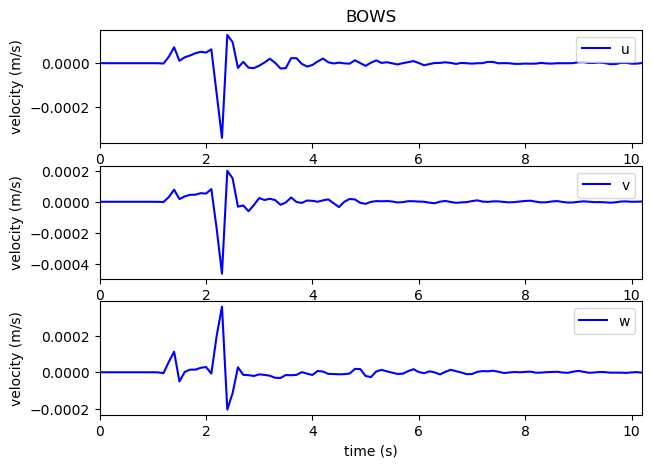

In [91]:
#site_num_file = stafolder + './sitemesh_number.txt')
# plot waveform

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'



nsite = 30

nstep = 252
dt = 0.2 # data sample rate

tt = np.linspace(0,nstep*dt-dt,nstep)


for k in range(1):
    
    fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,5))
    
    wfname = stafolder + modelname + '/sta'+ str(k)+ '.txt'
    wf = np.loadtxt(wfname)
    ax[0].plot(tt,wf[:,0],'-b',label='u')
    ax[0].legend()
    ax[0].set_title(siteTable.sta[k])
    ax[0].set_ylabel('velocity (m/s)')
    ax[0].set(xlim=(0,10.2))

    ax[1].plot(tt,wf[:,1],'-b',label='v')
    ax[1].legend()
    ax[1].set_ylabel('velocity (m/s)')
    ax[1].set(xlim=(0,10.2))

    ax[2].plot(tt,wf[:,2],'-b',label='w')
    ax[2].legend()
    ax[2].set_xlabel('time (s)')
    ax[2].set_ylabel('velocity (m/s)')
    ax[2].set(xlim=(0,10.2))
    
    plt.savefig('waveform'+str(k)+'.png',dpi=150)
    
    

10020.0


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


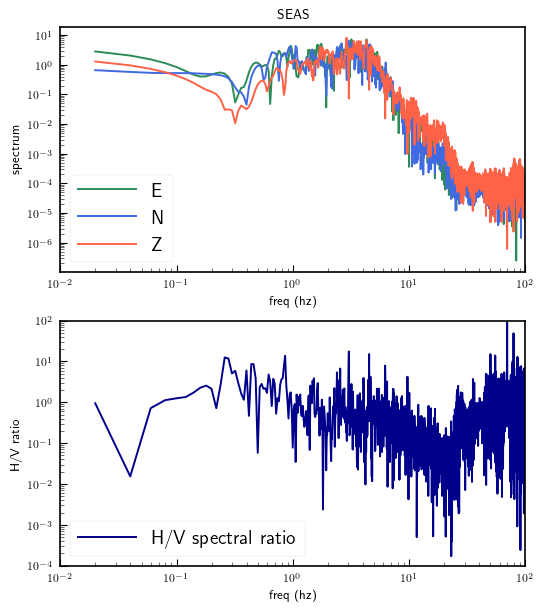

In [125]:
## plot spectrium for each station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

nsite = 30
duration = 50.1
SAMPLE_RATE = 1/0.005 # data sample rate

## data around the basin


N = duration * SAMPLE_RATE
Nt = int(np.round(N/2,1)-1)
print(N)

from scipy.fft import fft, fftfreq

folder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/'
# filename = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/test3Dv4-5hz-receiver-00020-00009.dat'
filename = folder + '/test3Dv4-5hz-receiver-00020-00009.dat'

filename = folder + 'test3Dv4-5hz-receiver-00016-00011.dat'
nsta = 16

t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
yf1 = fft(vx)
yf2 = fft(vy)
yf3 = fft(vz)
xf = fftfreq(int(N),1/SAMPLE_RATE)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
    
ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='E')
ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='N')
ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
ax[0].set(xlim=(0.01,100))
ax[0].set_xscale('log',base=10)
ax[0].set_yscale('log',base=10)
ax[0].set_title(siteTable.sta[nsta-1]) # index change
    
# plt.xlim(0,5)
ax[0].set_ylabel('spectrum')
ax[0].set_xlabel('freq (hz)')

ax[0].legend()

ax[1].plot((xf[1:Nt]), np.sqrt(yf1[1:Nt]**2 + yf2[1:Nt]**2)/np.sqrt(2)/np.abs(yf3)[1:Nt] ,'-',color='darkblue',label='H/V spectral ratio')

ax[1].set(xlim=(0.01,100),ylim=(1e-4,100))
ax[1].set_ylabel('H/V ratio')
ax[1].set_xlabel('freq (hz)')
ax[1].set_xscale('log',base=10)
ax[1].set_yscale('log',base=10)

ax[1].legend()

fftname = './FFT-'+ siteTable.sta[nsta-1]+ '.png'  # index change
plt.savefig(fftname,dpi=150)

# for k in [1,2,3,5,6]:
#     # Number of samples in normalized_tone
#     wfname = stafolder + modelname + '/'+ str(k)+ '.txt'
#     wf = np.loadtxt(wfname)
    
#     yf1 = fft(wf[:,0])
#     yf2 = fft(wf[:,1])
#     yf3 = fft(wf[:,2])
    
#     xf = fftfreq(N, 1 / SAMPLE_RATE)
    
#     plt.figure(figsize=(6,3))
    
#     plt.plot(xf[:Nt], np.abs(yf1)[:Nt],'-',color='seagreen',label='E')
#     plt.plot(xf[:Nt], np.abs(yf2)[:Nt],'-',color='royalblue',label='N')
#     plt.plot(xf[:Nt], np.abs(yf3)[:Nt],'-',color='tomato',label='Z')
#     # plt.xlim(0,5)
#     plt.ylabel('spectrum')
    
#     plt.legend()
#     fftname = stafolder + modelname + '/FFT-'+ siteTable.sta[k]+ '.png'
#     plt.savefig(fftname,dpi=150)

In [3]:
# import instaseis and dependency
import numpy as np

from obspy import read
# from obspy.taup import TauPyModel as taup
# from obspy.taup.taup_geo import calc_dist_azi as calc_dist_azi

from obspy.clients.fdsn import Client
# from obspy.signal.cross_correlation import correlate
# from obspy.signal.cross_correlation import xcorr_max


# plot regional seismic network and compare seismograph
from obspy.clients.fdsn import Client
# from obspy.geodetics import gps2dist_azimuth
from obspy import UTCDateTime
# from obspy.signal.rotate import rotate2zne

from obspy import read,read_inventory
# from obspy.signal.cross_correlation import xcorr
# from obspy.signal.rotate import rotate_ne_rt
from obspy import Trace, Stream

In [520]:
import pandas as pd
# rootfolder = '/home/duol/Documents/NSHM_SRM/'
rootfolder = '/Users/duoli/Documents/NSHM_SRM/'

siteTable = pd.read_csv(rootfolder + 'Model_kinematic/site_subtable2.csv')
# # print(siteTable['sta'])

df_d= siteTable.query('site_class=="D"')
df_c= siteTable.query('site_class=="C"')
df_b= siteTable.query('site_class=="B"')

# print(df_c['Vs30'])

In [524]:
print(siteTable.keys())

Index(['Unnamed: 0', 'net', 'sta', 'lat', 'lon', 'elev', 'site_class', 'Vs30',
       'Vs30_std', 'Q_Vs30', 'Vs30_Ref', 'T0', 'T0_std', 'Q_T0', 'D_T0',
       'T0_ref', 'Z1.0', 'Z1.0_std', 'Q_Z1.0', 'Z1.0_ref', 'Z2.5', 'Z2.5_std',
       'Q_Z2.5', 'Z2.5_ref', 'site_domain_no', 'basin'],
      dtype='object')


In [467]:
from obspy.clients.fdsn import Client

client  = Client("GEONET")

# longitude = siteTable.lon[0]
# latitude = siteTable.lat[0]

longitude,latitude = 174.9440964 ,-41.24207703                                                                                                                                
                                                                                                                    
startT = '2009-08-01 11:05:00.000'
# endT = '2009-09-01 11:00:00.000'

# startT = '2009-10-10 00:00:00.000'
# endT = '2009-10-10 23:59:00.000'

# startT = '2011-12-07 00:00:00.000'
# endT = '2011-12-07 23:59:00.000'

# startT = '2012-05-05 00:00:00.000'
endT = '2012-05-05 23:59:00.000'

# startT = '2021-01-01 00:00:00.000'
# endT = '2021-01-01 23:59:00.000'

# startT = '2024-02-28 00:00:00.000'
# endT = '2024-02-29 23:59:00.000'

# startT = '2016-06-21 00:00:00.000'
# endT = '2016-06-21 23:59:00.000'


cat = client.get_events(latitude=latitude,longitude=longitude,maxradius=0.4,minmagnitude=4.0, starttime=startT,endtime=endT) # Y
print(cat)

# cat.plot(projection="local")

9 Event(s) in Catalog:
2009-08-27T14:10:48.957000Z | -41.442, +174.709 | 4.7  Mw | manual
2009-08-27T15:52:29.593000Z | -41.434, +174.702 | 4.20 ML | manual
2009-10-10T05:02:35.546000Z | -41.162, +174.602 | 4.3  Mw | manual
2010-11-19T07:31:01.618000Z | -41.075, +175.086 | 4.29 ML | manual
2011-09-16T05:27:55.776000Z | -41.137, +174.694 | 4.2  ML | manual
2010-02-12T13:41:35.746000Z | -40.919, +174.961 | 4.2  Mw | manual
2011-02-18T04:51:53.747000Z | -41.376, +174.636 | 4.01 ML | manual
2011-03-01T09:07:51.124000Z | -41.197, +174.559 | 4.46 ML | manual
2012-05-05T23:33:13.277188Z | -41.391, +174.674 | 4.08 M  | manual


In [468]:
event = cat[8]
start = event.origins[0].time

inv = client.get_stations(network='NZ',channel='*',maxradius=0.4,latitude=latitude,longitude=longitude,level="response")

st_data = Stream()

for network in inv:
    for station in network:
        try:
            st = client.get_waveforms(network.code, station.code, "*", "*", start, start + 40)
            st.remove_response(inventory=inv.select(station=station.code),output='ACC')
            st.detrend('simple')
            st.rotate(method="->ZNE", inventory=inv.select(station=station.code))
            st_data += st
     
        except:
            pass

print(st_data.select(channel='HNE'))

# st.remove_response(inventory=inv,output='acc') 


22 Trace(s) in Stream:

NZ.ARKS.20.HNE | 2012-05-05T23:33:13.275000Z - 2012-05-05T23:33:38.995000Z | 200.0 Hz, 5145 samples
...
(20 other traces)
...
NZ.WNKS.20.HNE | 2012-05-05T23:33:13.275000Z - 2012-05-05T23:33:40.995000Z | 200.0 Hz, 5545 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [ ]:
# print(st_data.select(channel='*'))
inv.plot_response(0.01,station='VUWS')

In [481]:
# filter and band of freq of the synthetic recording

f1 = 0.001
f2 = 2.0 
# st_syn1 = st_syn.copy()
# st_syn1.differentiate() ## important
# st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

## filter of real recording
st_data1 = st_data.copy()
st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)
        
# sta = 'TEPS'
# print(st_syn.select(station=sta)[0].stats)

110 Trace(s) in Stream:

NZ.ARKS.20.HNZ | 2012-05-05T23:33:13.275000Z - 2012-05-05T23:33:38.995000Z | 200.0 Hz, 5145 samples
...
(108 other traces)
...
NZ.WNKS.20.HNE | 2012-05-05T23:33:13.275000Z - 2012-05-05T23:33:40.995000Z | 200.0 Hz, 5545 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [ ]:
# example
# sta_sele  = 'WNKS'
# st1 = st.select(station=sta_sele)
# st1.remove_response(inventory=inv.select(station=sta_sele),output='vel',plot=True) 
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

# num = 0 # Station CHN
# sta = 'WNKS'
rootfolder = '/Users/duoli/Documents/NSHM_SRM/'

for network in inv:
    for sta in network:
        try:
            plt.figure(figsize=(10, 8))
            
            ax3 = plt.subplot(311)
            ax3.plot(st_data1.select(station=sta.code,channel='HNE')[0].times(),st_data1.select(station=sta.code,channel='HNE')[0].data,'k',label='Data-HNE' )
            ax3.plot(st_syn1.select(station=sta.code,channel='BNE')[0].times(),st_syn1.select(station=sta.code,channel='BNE')[0].data,'r',label='Syn' )
            ax3.legend()
            ax3.set_title(sta.code)
            
            ax2 = plt.subplot(312)
            ax2.plot(st_data1.select(station=sta.code,channel='HNN')[0].times(),st_data1.select(station=sta.code,channel='HNN')[0].data,'k',label='Data-HNN' )
            ax2.plot(st_syn1.select(station=sta.code,channel='BNN')[0].times(),st_syn1.select(station=sta.code,channel='BNN')[0].data,'r',label='Syn' )
            ax2.legend()
            
            ax1 = plt.subplot(313)
            ax1.plot(st_data1.select(station=sta.code,channel='HNZ')[0].times(),st_data1.select(station=sta.code,channel='HNZ')[0].data,'k',label='Data-HNZ' )
            ax1.plot(st_syn1.select(station=sta.code,channel='BNZ')[0].times(),st_syn1.select(station=sta.code,channel='BNZ')[0].data,'r',label='Syn' )
            ax1.legend()
            
            outfolder = rootfolder + '/Model_kinematic/model2/p20090827/ACClowD36/'
            fftname = outfolder + './ACC3-'+ sta.code + '.png'  # index change
            
            plt.savefig(fftname,dpi=200)
            plt.close()
        except:
            pass


In [ ]:
# tranform FFT
# import matplotlib
# matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

from obspy.signal.invsim import cosine_taper 
from scipy import fftpack
# for network in inv:
#     for sta in network:
#         try:

stalist = ['LHRS','LHBS','TFSS','FKPS','TEPS','WEMS','WNKS']
# stalist = []

freq1 = np.logspace(-1,1,40)
sa_data = np.zeros(freq1.shape)
sa_syn= np.zeros(freq1.shape)

for idd, sta in enumerate(stalist):
    # freqlist, fas = fourierspec_cal(st_data1.select(station=sta,channel='HNZ')[0].data, st_data1.select(station=sta,channel='HNZ')[0].stats['delta'])
    # freqlist_syn, fas_syn = fourierspec_cal(st_syn1.select(station=sta,channel='BNZ')[0].data, st_syn1.select(station=sta,channel='BNZ')[0].stats['delta'])    
    print(sta)
    for id, ifreq in enumerate(freq1):
        # sa1_data[id], times_data, resp_data = sdof_response(st_data.select(station=sta,channel='HNE')[0].data, st_data.select(station=sta,channel='HNE')[0].stats['delta'],
                  # ifreq, dampfac=0.05)
        sa_data[id], times_data, resp_data = sdof_response(st_data1.select(station=sta,channel='HNZ')[0].data, st_data1.select(station=sta,channel='HNZ')[0].stats['delta'],
                  ifreq, dampfac=0.05)      
        # sa1_syn[id], times_syn, resp_syn = sdof_response(st_syn1.select(station=sta,channel='BNE')[0].data, st_syn1.select(station=sta,channel='BNE')[0].stats['delta'],
        #           ifreq, dampfac=0.05)
        sa_syn[id], times_syn, resp_syn = sdof_response(st_syn1.select(station=sta,channel='BNZ')[0].data, st_syn1.select(station=sta,channel='BNZ')[0].stats['delta'],
                  ifreq, dampfac=0.05)    
    fig,ax3 = plt.subplots(1,1,figsize=(6,4))
    
    
    ax3.plot(1/freq1,sa_data,'k',label='HNZ' )
    ax3.plot(1/freq1,sa_syn,'tomato',label='Syn.' )
    ax3.legend()
    ax3.set_title(sta)
    
    ax3.set(xlim=(0.1,10))
    ax2.invert_xaxis()
    # ax3.set_xlabel('freq (hz)')
    ax3.set_xlabel('period (s)')
    ax3.set_ylabel('SA (m/s^2)')
    ax3.set(ylim=(0.0001,1))
    ax3.set_xscale('log',base=10)
    ax3.set_yscale('log',base=10)
    ax3.grid(linestyle=':',which ='both')
    
    outfolder = rootfolder + '/Model_kinematic/model2/p20120505/ACClowD36/'
    fftname = outfolder + './SDOF-'+ sta + '.png'  # index change
    
    plt.savefig(fftname,dpi=300)

        # except:
        #     pass

In [472]:
## check synthetic data for comparison with real records

import os.path
from scipy.fft import fft, fftfreq

ch = ['BNE','BNN','BNZ']

# total site selected = 60
# duration = 50.1

SAMPLE_RATE = 1/0.005 # data sample rate in SeisSol
# N = duration * SAMPLE_RATE
# Nt = int(np.round(N/2,1)-1)

# event 1 p20090827
folder = '/Volumes/AvalonPark3/model2_2hz/lowVel/'
modelname = 'm2low'

folder = '/Volumes/AvalonPark3/model2_2hz/lowD36/'
modelname = 'm2lowD36'

## event2: p20091010

# folder = '/Volumes/AvalonPark/model3_2hz/'
# modelname = 'm3d15'

folder = '/Volumes/AvalonPark2/model5_2hz/'
modelname = 'm5d36'

# folder = '/Volumes/AVALONPARK4/m20240228_2hz/'
# modelname = 'mXd26'

st_syn = Stream()

for ista in range(121,181):
    ishift = 120

    if ista < 100 :
        filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'
    else:
        filename = folder + modelname + '-receiver-00' + str(ista) + '-00000.dat'

    if os.path.isfile(filename):
        
        t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)

        st = Stream([Trace(vx),Trace(vy),Trace(vz)])    
        
        for tr_num in range(3):
            st[tr_num].stats['sampling_rate'] = SAMPLE_RATE
            st[tr_num].stats['network'] = 'SeisSol'
            st[tr_num].stats['station'] = siteTable.sta[ista-1-ishift] 
            st[tr_num].stats['channel'] = ch[tr_num]
        st_syn += st

        # spetrum analys
        # yf1 = fft(vx)
        # yf2 = fft(vy)
        # yf3 = fft(vz)
        # xf = fftfreq(int(N),1/SAMPLE_RATE)

        # fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
            
        # # ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='EW')
        # # ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='NS')
        # ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
        # ax[0].set(xlim=(0.01,100))
        
        # ax[0].set_xscale('log',base=10)
        # ax[0].set_yscale('log',base=10)
        # ax[0].set_title('site: '+ siteTable.sta[ista-1]) # index change
            
        # # plt.xlim(0,5)
        # ax[0].set_ylabel('')
        # ax[0].set_xlabel('freq (hz)')
        
        # ax[0].legend()
        
        # # ax[1].plot(t,vx,'-',color='seagreen',label='EW')
        # # ax[1].plot(t,vy,'-',color='royalblue',label='NS')
        # ax[1].plot(t,vz,'-',color='tomato',label='Z')
        
        # ax[1].set(xlim=(0,40))
        # ax[1].set_ylabel('velocity (m/s)')
        # ax[1].set_xlabel('tims (s)')
    
    
        # # ax[1].legend()
        # outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/model2/'
        # fftname = outfolder + './wf-spec-'+ siteTable['sta'][ista-1] + '.png'  # index change
        # plt.savefig(fftname,dpi=150)
    else:
        pass

# filter and band of freq of the synthetic recording

## calculate from Vel to ACC
f1 = 0.001
f2 = 4.0 
st_syn1 = st_syn.copy()
st_syn1.differentiate()
st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

print(st_syn)
# real recording
# st_data1 = st_data.copy()
# st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)
            

162 Trace(s) in Stream:

SeisSol.ARKS..BNE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:40.095000Z | 200.0 Hz, 8020 samples
...
(160 other traces)
...
SeisSol.WTYS..BNZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:40.095000Z | 200.0 Hz, 8020 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Index(['Unnamed: 0', 'PublicID', 'Date', 'Latitude', 'Longitude', 'strike1',
       'dip1', 'rake1', 'strike2', 'dip2', 'rake2', 'ML', 'Mw', 'Mo', 'CD',
       'NS', 'DC', 'Mxx', 'Mxy', 'Mxz', 'Myy', 'Myz', 'Mzz', 'VR', 'Tva',
       'Tpl', 'Taz', 'Nva', 'Npl', 'Naz', 'Pva', 'Ppl', 'Paz', 'Method'],
      dtype='object')


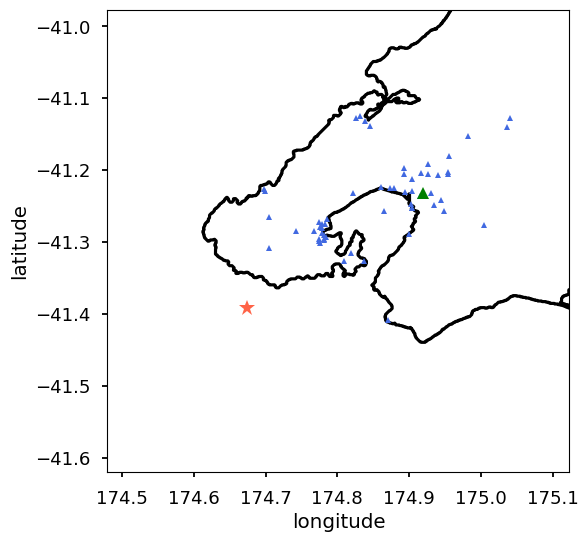

In [572]:
# print(surf[0],surf[1])
selectTable = siteTable.query('sta=="LIRS"')

filecsv= '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/cat_subtable.csv'
cat_subtable= pd.read_csv(filecsv)
print(cat_subtable.keys())

matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903
ext = 0.22

ieve= 4

fig , ax2 = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

ax2.plot(coast[0],coast[1],'-k',markersize=0.03)
ax2.plot(siteTable['lon'],siteTable['lat'],'^',color='royalblue',markersize=4.2)
ax2.plot(selectTable['lon'],selectTable['lat'],'^',color='green',markersize=8.2)

ax2.plot(cat_subtable['Longitude'][ieve-1],cat_subtable['Latitude'][ieve-1],'*',color='tomato',markersize=12.)

ax2.set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax2.set_aspect(1)
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

outname = 'map' + '-e20120505.png'
plt.savefig(outname, dpi=250, transparent=False)
plt.show()

In [573]:
# real recording
# st_data1 = st_data.copy()
# st_data1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)

# filter and band of freq of the synthetic recording

# f1 = 0.1
# f2 = 2.0 
# st_syn1 = st_syn.copy()
# st_syn1.differentiate() ## important
# st_syn1.filter('bandpass',freqmin=f1,freqmax=f2, corners=4, zerophase=True)
print(st_syn1.select(station='MKVS')[0].stats)


         network: SeisSol
         station: MKVS
        location: 
         channel: BNE
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:40.095000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 8020
           calib: 1.0
      processing: ["ObsPy 1.4.0: differentiate(method='gradient'::options={})", "ObsPy 1.4.0: filter(options={'freqmin': 0.001, 'freqmax': 4.0, 'corners': 4, 'zerophase': True}::type='bandpass')"]


In [ ]:
# load GeoNet data
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

file1 = '/Users/duoli/Downloads/2024p158594_BMTS/Response_spectra/2024p158594_NZ_BMTS_20HN_BP4_0.1_80.psa5.geocsv.csv'
resp1 = pd.read_csv(file1,skiprows=9)
print(resp1.keys())

fig,ax = plt.subplots(1,1,figsize=(5,4))

plt.plot(resp1.Period, resp1['Vertical PSA'],'-',c='tomato',label='Z')
plt.plot(resp1.Period, resp1['Horizontal PSA 1'],'-',c='forestgreen',label='1')
plt.plot(resp1.Period, resp1['Horizontal PSA 2'],'-',c='royalblue',label='2')
plt.legend()
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')
ax.set_title('spectral response')
ax.set_xlabel('period')
ax.set_ylabel('acceleration (m/s^2)')
plt.savefig('response.png',dpi=300)
plt.show()
plt.close()



In [ ]:
# from obspy import read_events
# names = 'Stream,Time,Vertical,Horizontal 1,Horizontal 2'
# events = read_events('/Volumes/AvalonPark0/m20240228/mseed/2024p158594_LHBS/Filtered_time_series/2024p158594_NZ_LHBS_20HN_BP4_0.1_80.filtered.csv','csv',skipheader=8,names=names)
# print(events)


In [ ]:
# plot Geonet data Velocity
# file1 = '/Users/duoli/Downloads/2024p158594_BMTS/Filtered_time_series/2024p158594_NZ_BMTS_20HN_BP4_0.1_80.filtered.geocsv.csv'
# seri1 = pd.read_csv(file1,skiprows=8)
# print(seri1.keys(),seri1.Time.shape)
# seri_df = seri1.query('Time=="2024-02-28T16:18:56.010"')
# print(seri_df)

# llen = np.int32(40/0.005)
# print(llen)

# time1 = np.linspace(0,seri1.Time.shape[0]*0.005, seri1.Time.shape[0])

# time = time1[11176:11176+llen]

# vz = seri1['Vertical'][11176:11176+llen]
# v1 = seri1['Horizontal 1'][11176:11176+llen]
# v2 = seri1['Horizontal 2'][11176:11176+llen]

# fig,ax = plt.subplots(3,1,figsize=(6,8))

# ax[0].plot(time, vz,'-',c='black',linewidth=1, label='HNZ')
# ax[0].legend()

# ax[1].plot(time, v1,'-',c='black',linewidth=1, label='HN1')
# ax[1].legend()

# ax[2].plot(time, v2,'-',c='black',linewidth=1, label='HN2')
# ax[2].legend()

# # ax.grid(which='both',linestyle=':')
# ax[0].set_title('filtered data')
# ax[2].set_xlabel('period')
# ax[2].set_ylabel('velocity (m/s)')
# # ax[0].set(xlim=[50,100])
# ax[1].sharex(ax[0])
# ax[2].sharex(ax[0])

# plt.savefig('data.png')
# plt.show()
# plt.close()

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pylab as plt
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

modelname = 'test3Dv2-2hz-o5'
# fig.ax = plt.subplots(2,1,figsize=(6,5))

df = pd.read_csv('/Volumes/AvalonPark0/test3Dv2-2hz-o5/' + modelname + "-energy.csv")

df = df.pivot_table(index="time", columns="variable", values="measurement")
df["seismic_moment_rate"] = np.gradient(df["seismic_moment"], df.index[1])
df.plot(y="seismic_moment_rate", use_index=True)

# if ComputeVolumeEnergiesEveryOutput > 1
volume_output = df.dropna()
volume_output.plot(y="elastic_energy", use_index=True)
plt.savefig('energyout.png')
plt.show()

In [308]:
# check coordinates of stations

# print(st1.spectrogram())
# data = inv.get_coordinates("NZ.LHRS.20.HNZ")
# staTable = pd.DataFrame(index=data.keys())
# print(staTable)

# for network in inv:
#     for station in network:
#         try:
#             name = network.code + '.' + station.code + '.' + str(20) + '.HNZ'
#             # print(inv.get_coordinates(name).values())
#             staTable = staTable.append(data = inv.get_coordinates(name).values(),index=inv.get_coordinates(name).keys())
#             staTable.tail()
#         except:
#             pass

# print(staTable)
# long1 = s

Empty DataFrame
Columns: []
Index: [latitude, longitude, elevation, local_depth]
Empty DataFrame
Columns: []
Index: [latitude, longitude, elevation, local_depth]


### Test: coordinate convert

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from obspy import read_inventory, read_events

# Set up a custom projection
projection = ccrs.AlbersEqualArea(
    central_longitude= 174,
    central_latitude= -41,
    standard_parallels=(-60,-30)
)

# Set up a figure
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection=projection)
ax.set_extent((150., 180., -60., -30.))

# Draw standard features
ax.gridlines()
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.BORDERS)

ax.set_title("Albers Equal Area Projection")

# Now, let's plot some data on the map
inv.plot(fig=fig, show=False)
cat.plot(fig=fig, show=False, title="", colorbar=False)

plt.show()

## Ground Motion visualization
####  PGV PGA map
#### SA 1.0 0.3 3.0 sec vs. distance (km) plot

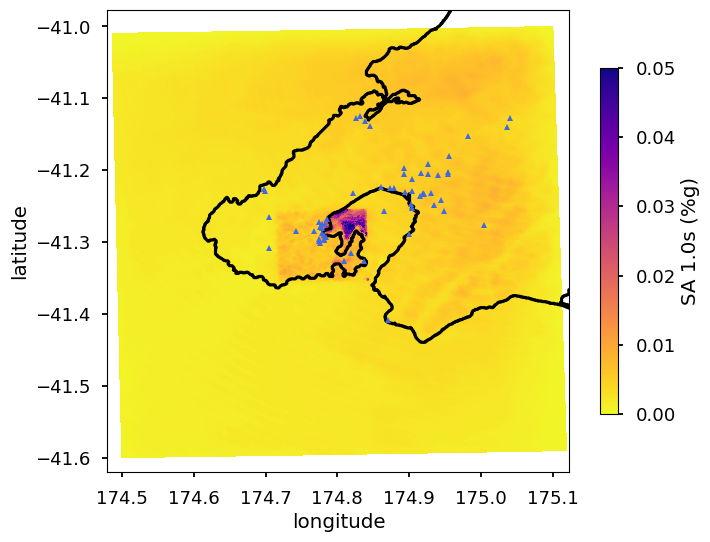

In [537]:
# print(surf[0],surf[1])
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903
ext = 0.22

fig , ax2 = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

sc = ax2.tripcolor(triang,sa1/0.098,cmap='plasma_r',shading='flat',vmin = 0,vmax = 0.05)
cl = fig.colorbar(sc,ax=ax2,shrink=0.75)

ax2.plot(coast[0],coast[1],'-k',markersize=0.03)
ax2.plot(siteTable['lon'],siteTable['lat'],'^',color='royalblue',markersize=4.2)
cl.set_label('SA 1.0s (%g)')

ax2.set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax2.set_aspect(1)
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

outname = modelname + '-map-SA1.0s.png'
plt.savefig(outname, dpi=250, transparent=False)
plt.show()

In [ ]:
# print(siteTable.lon,siteTable.lat)

In [542]:
# load data
# modelname = 'mXd26psM2'
modelname = 'm2lowD15'
modelname = 'm3d15'
modelname = 'm5d36'
modelname = 'mXd26vpvs285'
xdmfFilename = '/Volumes/AvalonPark0/m20240228/' + modelname + '-GME-surface.xdmf'
# xdmfFilename = '/Volumes/AvalonPark0/model5_2hz/' + modelname + '-GME-surface.xdmf'

filecsv= '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/cat_subtable.csv'
cat_subtable= pd.read_csv(filecsv)

ieve = 3 # m2lowD15
ieve = 9 # p2024
      
# convert  # UTM projection
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
xss,yss = pyproj.transform(lla,myproj,cat_subtable["Longitude"],cat_subtable["Latitude"])

print(cat_subtable.ML[ieve],cat_subtable.PublicID[ieve])

origin = (xss[ieve],yss[ieve])

pga,pgv,sa1,sa3,sa0_3,triang,depi = load_surf_gm(xdmfFilename,origin)

dataTable = get_idensity_table(stafolder,stafile,xdmfFilename,modelname,origin)

4.7 2024p158594


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/AvalonPark0/m20240228/mXd26vpvs285-GME-surface.xdmf'

In [405]:
# event 0
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/3145159_summary.csv' # m2
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/3165869_summary.csv' # m3
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/3623397_summary.csv' # m4 empty
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/2012p340490_summary.csv' # m5

obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/2024p158594_summary.csv'
obvTable = pd.read_csv(obvfile, skiprows=4)

print(obvTable.keys())

Index(['Event Id', 'Origin', 'Depth', 'Mag Type', 'Magnitude', 'Network',
       'Station', 'Location', 'Latitude', 'Longitude', 'Elevation',
       'Epicentral Distance', 'PGA Vertical', 'PGA Horizontal 1',
       'PGA Horizontal 2', 'PGA Vertical.1', 'PGA Horizontal 1.1',
       'PGA Horizontal 2.1', 'PGV Vertical', 'PGV Horizontal 1',
       'PGV Horizontal 2', 'PSA 0.3 Vertical', 'PSA 0.3 Horizontal 1',
       'PSA 0.3 Horizontal 2', 'PSA 1.0 Vertical', 'PSA 1.0 Horizontal 1',
       'PSA 1.0 Horizontal 2', 'PSA 3.0 Vertical', 'PSA 3.0 Horizontal 1',
       'PSA 3.0 Horizontal 2', 'Site Name'],
      dtype='object')


In [515]:
## plot PGA vs. distance for each event/model

# import seaborn as sbn
# data = {"distance (km)": depi/1e3,"PGA (%g)": pga/0.098, "PGV (cm/s)": pgv*100,  "SA 1.0 (%g)": sa1/0.098,  "SA 2.5 (%g)": sa2_5/0.098, "SA 0.25 (%g)": sa0_25/0.098 }
# df_all = pd.DataFrame(data)
# df = pd.DataFrame(dataTable)

fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="PGV (cm/s)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="PGV (cm/s)",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PGV Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PGV Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PGV Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,10))
plt.savefig(modelname +"-pgv-dist.png",dpi=300)
plt.close()


In [538]:
# import seaborn as sbn
# peak spectral acceleration

data = {"distance (km)": depi/1e3,"PGA (%g)": pga/0.098, "PGV (cm/s)": pgv*100,  
        "SA 1.0 (%g)": sa1/0.098,  "SA 3.0 (%g)": sa3/0.098, "SA 0.3 (%g)": sa0_3/0.098 }
df_all = pd.DataFrame(data)
df = pd.DataFrame(dataTable)

# print(df.keys)
fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="SA 3.0 (%g)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="SA 3.0",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 3.0 Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 3.0 Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 3.0 Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,1))
plt.savefig(modelname +"-SA3.0s-dist.png",dpi=300)
plt.close()

In [514]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="SA 1.0 (%g)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="SA 1.0",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 1.0 Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 1.0 Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 1.0 Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,10))
plt.savefig(modelname +"-SA1.0s-dist.png")
plt.close()

In [517]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="SA 0.3 (%g)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="SA 3.0",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 0.3 Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 0.3 Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 0.3 Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,10))
plt.savefig(modelname +"-SA0.3s-dist.png",dpi=300)
plt.close()

In [540]:
# load gpa and datas 
def get_idensity_table(stafolder, stafile, xdmfFilename,modelname,origin=(0,0)):

    '''create a table with  idensity data as a DataFrame'''
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    surfxyz= sx.ReadGeometry()
    connect = sx.ReadConnect()
    

    sitexyz = np.loadtxt(staFile)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.

    Receiver = np.array(sitexyz)
        
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    depi = np.sqrt( (centers[ids,0]-origin[0])**2 + (centers[ids,1]-origin[1])**2)

    print(depi.shape)
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    pgd = sx.ReadData('PGD')
    sa1 = sx.ReadData('SA01.000s')
    sa3 = sx.ReadData('SA02.500s')
    # sa4 = sx.ReadData('SA00.250s')
    # sa8 = sx.ReadData('SA00.125s')
    sa0_3 = sx.ReadData('SA00.250s')

    dataTable = {"distance (km)": depi/1e3, "PGD (m)": pga[ids]/0.098, "PGV (cm/s)": pgv[ids]*100, "SA 3.0": sa3[ids]/0.098,"SA 1.0": sa1[ids]/0.098,"SA 0.3": sa0_3[ids]/0.098}
    return dataTable
    



In [541]:
## load data and plot 

# import seissolxdmf
# import pyproj
# import matplotlib.tri as tri


# coastfile ='./Geometry/CoastNorth.txt.npy'
# coast =  np.load(coastfile)
# print(coast)

def load_surf_gm(xdmfFilename,origin=(0,0)):
                 
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
    ndt = sx.ReadNdt()
    surfxyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    
    print(surfxyz.shape,connect.shape)
    
    # convert  # UTM projection
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
    
    surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
    
    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    depi = np.sqrt( (centers[:,0]-origin[0])**2 + (centers[:,1]-origin[1])**2)
    
    # print(surf.shape)
    ############# load GMPEs data  ##############
    triang = tri.Triangulation(surf[0],surf[1],connect) # in longitude and latititude
    # triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in Cartesian xyz coords.
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    sa1 = sx.ReadData('SA01.000s')
    sa3 = sx.ReadData('SA02.500s')
    # sa4 = sx.ReadData('SA00.250s')
    # sa8 = sx.ReadData('SA00.125s')
    sa0_3 = sx.ReadData('SA00.250s')
    # sa0_2 = sx.ReadData('SA05.0000s')
    
    return pga,pgv,sa1,sa3,sa0_3, triang,depi

# print(triang)

# surf = pyproj.transform(myproj, lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
# triang = tri.Triangulation(surf[0],surf[1],connect)


## Station-to-station compariston PGA

In [49]:
# plot PGV curve vs. epicentral distance
# epi1 = np.array([ 174.75, -41.3, -1.0])

# stafolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/'
# staIndex  = modelname +'-site_number.txt'

# sIndex = np.loadtxt(stafolder+staIndex)
# print(sIndex[:,0])
# idx  = np.floor(sIndex[:,0])

# pga_data = {"PGA": pga[idx],"distance (km)": }

[27668. 67526. 36593. 48977. 73133. 53970. 57959. 41941. 85561. 14392.
 16371. 15444. 45594. 28350. 50796. 54376. 59626. 22562. 50809. 58032.
 85326. 61417. 62262. 66340. 64204.  7786. 29133. 42762. 10203. 44467.
 44467. 81545. 45198. 28541. 85378. 45023. 52891. 47627. 51779. 85370.
 78063. 59591. 37501. 26901. 35172. 41976. 85382. 84577. 47934. 11336.
 69586. 18191. 72862. 13939. 79448. 83495. 80251. 74440. 28303. 85430.]


In [ ]:
# Basin Edge observations

# matplotlib.style.use('seaborn-v0_8-pastel')

# # xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
# # modelname = 'test3Dv4-5hz'

# nsite = 43 # receivers
# duration = 30.1

# ## data around the basin

# SAMPLE_RATE = 1/0.005 # data sample rate
# N = duration * SAMPLE_RATE
# Nt = int(np.round(N/2,1)-1)
# print(N)

# from scipy.fft import fft, fftfreq


# folder = 'Model_kinematic/model2/siteRecord/'
# folder = '/Volumes/AvalonPark3/model2_2hz/lowVel/'
# modelname = 'm2low'


# for ista in range(1,61):

#     if ista < 10 :
#         filename = folder + modelname + '-receiver-0000' + str(ista) + '-00000.dat'
#     else:
#         filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'

    
#     t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
#     yf1 = fft(vx)
#     yf2 = fft(vy)
#     yf3 = fft(vz)
#     xf = fftfreq(int(N),1/SAMPLE_RATE)
    
#     fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
        
#     ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='EW')
#     ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='NS')
#     ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
#     ax[0].set(xlim=(0.01,100))
#     ax[0].set_xscale('log',base=10)
#     ax[0].set_yscale('log',base=10)
#     ax[0].set_title('receiver: '+ str(ista)) # index change
        
#     # plt.xlim(0,5)
#     ax[0].set_ylabel('Spectrum')
#     ax[0].set_xlabel('freq (hz)')
    
#     ax[0].legend()
    
#     ax[1].plot(t,vx,'-',color='seagreen',label='EW')
#     ax[1].plot(t,vy,'-',color='royalblue',label='NS')
#     ax[1].plot(t,vz,'-',color='tomato',label='Z')
    
#     ax[1].set(xlim=(0,30),ylim=(-0.1,0.1))
#     ax[1].set_ylabel('velocity (m/s)')
#     ax[1].set_xlabel('tims (s)')


#     # ax[1].legend()
#     outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/WelBasinRec/test3Dv2-2hz/'
#     fftname = outfolder + './Topo-WF-'+ str(sta) + '.png'  # index change
#     plt.savefig(fftname,dpi=150)


In [173]:
# load topographic data
from load_topo_data import load_topo_data

ncfile = '/Users/duoli/Documents/NSHM_SRM/Geometry/NZ_gebco_03s.grd'
# ncfile = '../Geometry/NZ_gebco_01s.grd'

topo, xrange,yrange = load_topo_data(ncfile)
print(topo.shape,xrange.shape)

(1746511.3065337986, 5426462.244420674)
(246, 246) (246,)


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:41: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_map = pyproj.transform(lla, myproj, x_lon,y_lat,np.zeros(len(x_lon)), radians=False)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:49: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_sou = pyproj.transform(lla, myproj, lon_sou,lat_sou, radians=False) # Epicenter in UTM domain


In [176]:
from FigFunc.load_vel_csv import load_vel_csv

In [178]:
csvfile = './basin_structure/WGTN3D_v5_VsModel_density.csv'

Nx = 40
Nz = 129

grdx,grdy,grdz, grdvel,grdrho = load_vel_csv(csvfile,Nx,Nz)

print(grdvel.shape, grdy.shape,grdz.shape)
print(grdvel.min(),grdrho.min())

Index(['X', 'Y', 'Z', 'WGTN3D_v5', 'GSURFDIST', 'Vs_CALC', 'Vs_BLOCK',
       'DENSITY'],
      dtype='object')
129 215 224
(129, 40, 40) (40,) (129,)
0.0 1.0


In [426]:
# code from Sanjay; uniformly process data

def fourierspec_cal(data, dtsamp):
    ''' Gives the Fourier amplitude spectrum of a input signal.
    Parameters
    -----------------------
    data: array like
        input time signal
    dtsamp :
        sampling interval

    Returns
    freqlist: array like
        The positive signal frequencies
    fas : array like
        Positive frequency side FAS.'''
    n = len(data)
    taper = cosine_taper(n)
    sign_tap = taper*data # Tapered signal
    fft = dtsamp*fftpack.fft(sign_tap) # See the documentation of scipy.fftpack
    # Multiplication with sampling period makes it equivalent to continous Fourier transform. See Mathematica code of
    # Frank Scherbaum and fourierspec_Cal.
    freqlist = fftpack.fftfreq(n, dtsamp)
    freqs_mask = (freqlist >= 0)
    freqlist = freqlist[freqs_mask]
    fas = np.abs(fft)
    fas = fas[freqs_mask]
    return freqlist, fas

In [427]:
def sdof_response(dat, dtsamp, fosc, dampfac=0.05):
    '''This gives the single degree of freedom oscillator response for acceleration motion.

    Parameters
    --------------------
    dat: array like
    the input acceleration data without the time samples
    dtsamp: float
    the sampling interval of the time series.
    fosc: float
    The natural frequency of the SDOF oscillator at which the response is desired.
    dampfac: float
    damping of the SDOF oscillator, its optional default is the usual 0.05.

    Returns
    ----------------------
    sa: float
    the absolute spectral amplitude or the maximum of the response motion
    times: array
    the time samples for the response motion same as for the input motion
    resp : array
    the full response motion of acceleration
    '''
    # See the mathematica version in Response Spectrum and for algorithm see the book in German.
    omegaosc = 2 * np.pi * fosc
    lamda = -dampfac * omegaosc + 1j * omegaosc * np.sqrt(1 - dampfac ** 2)
    c1 = np.exp(lamda * dtsamp)
    c2 = 2 * (1 - c1) / ((lamda - np.conj(lamda)) * dtsamp)
    y0 = 2 * lamda * (-dat[0]) / (lamda - np.conj(lamda))
    deltaai = dat[1:] - dat[:-1]     # the linear approximation of acceleration between adjacent samples.
    yi = y0
    resp = np.empty(len(dat))
    resp[0] = np.real(yi)
    for i, deltaa in enumerate(deltaai, 1):
        yi = c1 * yi + c2 * deltaa
        resp[i] = np.real(yi)        # first resp is relative motion
    resp = resp + dat                # Finally I compute total absolute movement by adding resp with input acceleration
    sa = max(np.abs(resp))
    times = np.arange(0, len(dat) * dtsamp, dtsamp, dtype=float)
    return sa, times, resp

## Prepare STF in the format of SRF

In [552]:
# write source file to srf.
from FaultPlaneWrite.FaultPlaneWrite import * 

rootfolder = '/Users/duoli/Documents/NSHM_SRM/'

srffile =  rootfolder + 'p20240228.srf'
fault1 = FaultPlane()
fault1.init_from_srf(srffile)

# write source file for event 

sourcefile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/cat_subtable_redat_reupdated.csv'
seisTable = pd.read_csv(sourcefile)
print(seisTable.keys())

print(fault1.lon.shape)

ieve = 3
isource = ieve * 2 -1 

fault_out = FaultPlane()
fault_out.strike = np.array([[ seisTable.Strike[isource] ]])
fault_out.dip = np.array([[seisTable.Dip[isource] ]])
fault_out.rake = np.array([[seisTable.Rake[isource] ]])
fault_out.PSarea_cm2= np.array([[seisTable["Area_km^2"][isource] * 1e10 ]]) # area
fault_out.lat = np.array([[ seisTable.Lat[isource]]])
fault_out.lon= np.array([[ seisTable.Lon[isource] ]])
fault_out.slip1 =np.array([[  seisTable.Slip_cm[isource] ]])
fault_out.depth =np.array([[ seisTable.Dep[isource] ]])
fault_out.aSR = fault1.aSR
fault_out.ndt = 151
fault_out.t0 = np.array([[0.0]])
fault_out.dt = 0.01
fault_out.nx = 1
fault_out.ny = 1

print(fault_out.lon.shape, fault_out.strike)

fault_out.write_srf(seisTable.PublicID[isource] + '_format.srf')

print('area and slip:',fault_out.PSarea_cm2, fault_out.slip1,  ) 
print('M0=',fault_out.PSarea_cm2/1e4 * fault_out.slip1/100 * 40e9 ) 

Index(['PublicID', 'Lon', 'Lat', 'Dep', 'Slip_cm', 'Strike', 'Dip', 'Rake',
       'Area_km^2'],
      dtype='object')
(1, 1)
(1, 1) [[279.]]
done writing 3623397_format.srf
area and slip: [[4.47713e+09]] [[4.184225]]
M0= [[7.49332771e+14]]


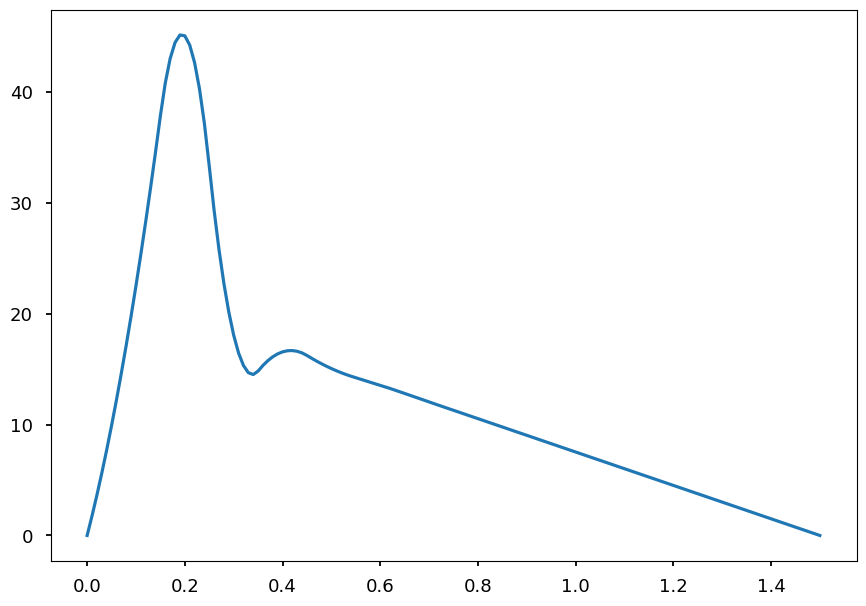

In [61]:
#plot STF
import seaborn as sbs

time = np.linspace(0,1.5,num=fault.ndt)

plt.figure()
plt.plot(time,fault.aSR[0,0,:],'-')
plt.savefig('STF_srf.png')
plt.show()

Type:        module
String form: <module 'scipy.integrate' from '/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/integrate/__init__.py'>
File:        ~/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/integrate/__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   newton_cotes  -- Weights and error coefficient for Newton-Cotes inte

In [ ]:
fault.aSR[0,0,:]

In [292]:
vs = 4.0e3
rho = 2.67e3
mu =  vs**2 * rho

# mu = 3e10
slp = 0.08
area = 1.12e6

m0 = mu*slp*area

print("%5.3e"%mu, "%5.3e"%m0)

4.272e+10 3.828e+15
